<a href="https://colab.research.google.com/github/Schollera/MAT421/blob/main/MAT421_ModJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sohan Chollera

HW#12 | MAT421

Module J

In [1]:
import numpy as np
import networkx as nx
from scipy.linalg import eigh

# Weighted undirected graph
G = nx.Graph()
G.add_weighted_edges_from([
    (0, 1, 2),
    (1, 2, 3),
    (2, 3, 1),
    (3, 0, 4),
    (1, 3, 2)])

# adjacency matrix and Laplacian
A = nx.to_numpy_array(G)
D = np.diag(A.sum(axis=1))
L = D - A
print("Laplacian Matrix L:\n", L)

# eigenvalues + eigenvectors
e_vals, e_vecs = eigh(L)
print("Eigenvalues:", e_vals)

# eigenvalue is ~0; Fiedler vector is 2nd smallest
print("Fiedler Vector (2nd smallest eigenvector):\n", e_vecs[:, 1])

Laplacian Matrix L:
 [[ 6. -2.  0. -4.]
 [-2.  7. -3. -2.]
 [ 0. -3.  4. -1.]
 [-4. -2. -1.  7.]]
Eigenvalues: [1.42108547e-14 3.88990793e+00 9.48027880e+00 1.06298133e+01]
Fiedler Vector (2nd smallest eigenvector):
 [ 0.53834044 -0.14658002 -0.7490374   0.35727698]


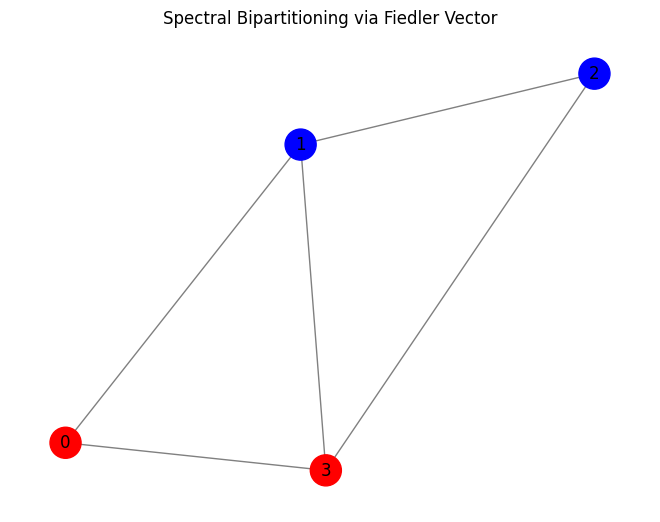

In [2]:
import matplotlib.pyplot as plt

# Partition using sign of Fiedler
fiedler = e_vecs[:, 1]
partition = fiedler > 0

# Draw graph
pos = nx.spring_layout(G)
colors = ['red' if part else 'blue' for part in partition]
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=500)
plt.title("Spectral Bipartitioning via Fiedler Vector")
plt.show()

Eigenvector Centrality:
Node 0: 0.535
Node 1: 0.522
Node 2: 0.344
Node 3: 0.568


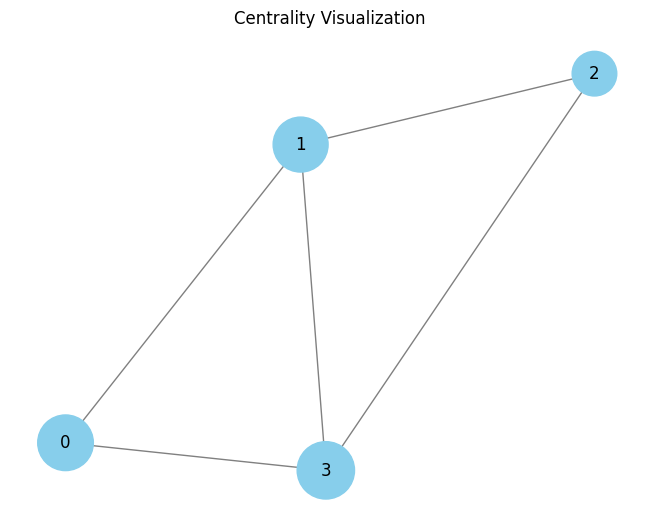

In [3]:
# eigenvector centrality
centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# results
print("Eigenvector Centrality:")
for node, value in centrality.items():
    print(f"Node {node}: {value:.3f}")
sizes = [3000 * centrality[n] for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color='skyblue', edge_color='gray')
plt.title("Centrality Visualization")
plt.show()

In [5]:
# two clusters
cluster1 = {0, 1}
cluster2 = {2, 3}

# Ratio cut
def ratio_cut(G, c1, c2):
    cut = nx.cut_size(G, c1, c2, weight='weight')
    return cut / len(c1) + cut / len(c2)

# Normalized cut
def normalized_cut(G, c1, c2):
    vol1 = sum(dict(G.degree(c1, weight='weight')).values())
    vol2 = sum(dict(G.degree(c2, weight='weight')).values())
    cut = nx.cut_size(G, c1, c2, weight='weight')
    return cut / vol1 + cut / vol2

print("Ratio Cut:", ratio_cut(G, cluster1, cluster2))
print("Normalized Cut:", normalized_cut(G, cluster1, cluster2))

Ratio Cut: 9.0
Normalized Cut: 1.5104895104895104
